In [1]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


In [2]:
df=pd.read_csv('data/kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
# Counting the number of features and their names
print(len(df.columns))

print('Features Names: ',df.columns)

21
Features Names:  Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [5]:
# Describe the data
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
# Show the summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

We could see that features as "waterfront, view, yr_renovated" contains null values and also some features have object dtype which has to be int64 such as sqft_basement, Date has to be time series not object dtype. Some features needs to be encoded such as view, condition & grade while others needs to be bool such as waterfront.

Columns Modifications (null values, dtype & handling values):

In [7]:
# Convert Date to time series
df['date']=pd.to_datetime(df['date'],format='%m/%d/%Y')

waterfront : [nan 'NO' 'YES']
No. of null values in waterfront are : 2376


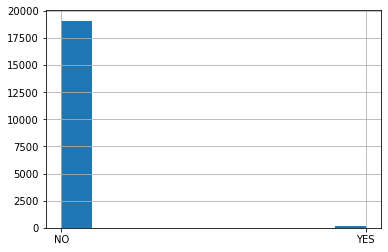

In [8]:
# Checking the values of waterfront feature
print("waterfront :",df['waterfront'].unique())
print("No. of null values in waterfront are :",df.waterfront.isna().sum())
df['waterfront'].hist()
plt.show()

We have replace all the null values of waterfront column with NO as its the most common (mode). 

Let's Encode waterfront column :

In [9]:
# Replace all null values of waterfront with No as it is the most popular 
df['waterfront']=df['waterfront'].fillna('NO')
waterfront_encoder={'YES':1, 'NO':0}
df['waterfront']=df['waterfront'].replace(waterfront_encoder)
print("waterfront after encoding: ",df['waterfront'].unique())

waterfront after encoding:  [0 1]


Let's check View feature:

In [10]:
df['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [11]:
# Checking the values of view feature
print("view :",df['view'].unique())

# Replace all null values with none as they are the same
df['view']=df['view'].fillna('NONE')

# Encoding the view to convert it from categorical to number
view_encoder={'NONE':0, 'FAIR':1, 'AVERAGE':2, 'GOOD':3, 'EXCELLENT':4}
df['view']=df['view'].replace(view_encoder)
print("view after encoding: ",df['view'].unique())

view : ['NONE' nan 'GOOD' 'EXCELLENT' 'AVERAGE' 'FAIR']
view after encoding:  [0 3 4 2 1]


We have filled the null values with NONE and then made encoding to the view feature to be numbers instead of categories.

Let's check Condition feature:

In [12]:
# Checking the values of condition feature
print("condition :",df['condition'].unique())


# Encoding the condition featrue to convert it from categorical to number
condition_encoder={'Poor':0, 'Fair':1, 'Average':2, 'Good':3, 'Very Good':4}

df['condition']=df['condition'].replace(condition_encoder)
print("condition after encoding: ",df['condition'].unique())

condition : ['Average' 'Very Good' 'Good' 'Poor' 'Fair']
condition after encoding:  [2 4 3 0 1]


We have made  ordinal encoding to the Condition feature to be numbers instead of categories.

Let's check Grade feature:

In [13]:
# Checking the values of grade feature
print("grade :",df['grade'].unique())


# Spliting the grade feature to convert it from categorical to number
df['grade']=df['grade'].str.split(' ',n=1,expand=True)

print("grade after splitting the column: ",df['grade'].unique())

grade : ['7 Average' '6 Low Average' '8 Good' '11 Excellent' '9 Better' '5 Fair'
 '10 Very Good' '12 Luxury' '4 Low' '3 Poor' '13 Mansion']
grade after splitting the column:  ['7' '6' '8' '11' '9' '5' '10' '12' '4' '3' '13']


We have modified Grade column to be numeric instead of a string to be easily ysed in the models

Let's check yr_renovated feature:

In [14]:
# Checking the values of waterfront feature
print("yr_renovated :",df['yr_renovated'].unique())
print("No. of null values in yr_renovated are :",df.yr_renovated.isna().sum())
print("No. of values of yr_renovated that are equal to zero :",len(df[df['yr_renovated']==0]))

# Therefore we can replace all null values with the mode of the data
df['yr_renovated']=df['yr_renovated'].fillna(df['yr_renovated'].mode()[0])
print("No. of null values in yr_renovated after modification are :",df.yr_renovated.isna().sum())


yr_renovated : [   0. 1991.   nan 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984.
 1954. 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999.
 1998. 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971.
 1979. 1997. 1950. 1969. 1948. 2009. 2015. 1974. 2008. 1968. 2012. 1963.
 1951. 1962. 1953. 1993. 1996. 1955. 1982. 1956. 1940. 1976. 1946. 1975.
 1964. 1973. 1957. 1959. 1960. 1967. 1965. 1934. 1972. 1944. 1958.]
No. of null values in yr_renovated are : 3842
No. of values of yr_renovated that are equal to zero : 17011
No. of null values in yr_renovated after modification are : 0


We have replaced the null values with the mode of the yr_renovated which is zero

Let's check sqft_basement feature:

In [15]:
df['sqft_basement'].value_counts()
sqft_basement_encoder={'?':0}
# Let's fill the null values with the mode
df['sqft_basement']=df['sqft_basement'].replace(sqft_basement_encoder)

# Change the dtype of sqft_basement column from object to float
df['sqft_basement']=df['sqft_basement'].astype(str).astype(float)

We found that there are wrong values for sqft_basement ('?') which need to removed, so it may means that they don't know whether there is basement or not so we can replace it by 0

Let's check Bathrooms feature:

In [16]:
# Checking the values of Bathrooms feature
print("Bathrooms :",df['bathrooms'].unique())

# Round the values as the bathrooms has to be intergers not decimals
df['bathrooms']=df['bathrooms'].round()

print("Bathrooms after modifications:",df['bathrooms'].unique())


Bathrooms : [1.   2.25 3.   2.   4.5  1.5  2.5  1.75 2.75 3.25 4.   3.5  0.75 4.75
 5.   4.25 3.75 1.25 5.25 6.   0.5  5.5  6.75 5.75 8.   7.5  7.75 6.25
 6.5 ]
Bathrooms after modifications: [1. 2. 3. 4. 5. 6. 0. 7. 8.]


We found that the values of bathrooms are decimals although they have to be integers. We have converted it to be integers

In [17]:
# Let's check our dtypes of features after these modifications
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  int64         
 9   view           21597 non-null  int64         
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  object        
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  float64       
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   2159

We could see that the grade column is object although we have splitted it to numbers. We will modify its type from object to int64

In [18]:
# Let's convert the grade column to be int64
df['grade']=df['grade'].astype(str).astype(int)

In [19]:
# By this we should have all features int and float
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  int64         
 9   view           21597 non-null  int64         
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  float64       
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   2159

Let's have some visualizations on the data:

<AxesSubplot:>

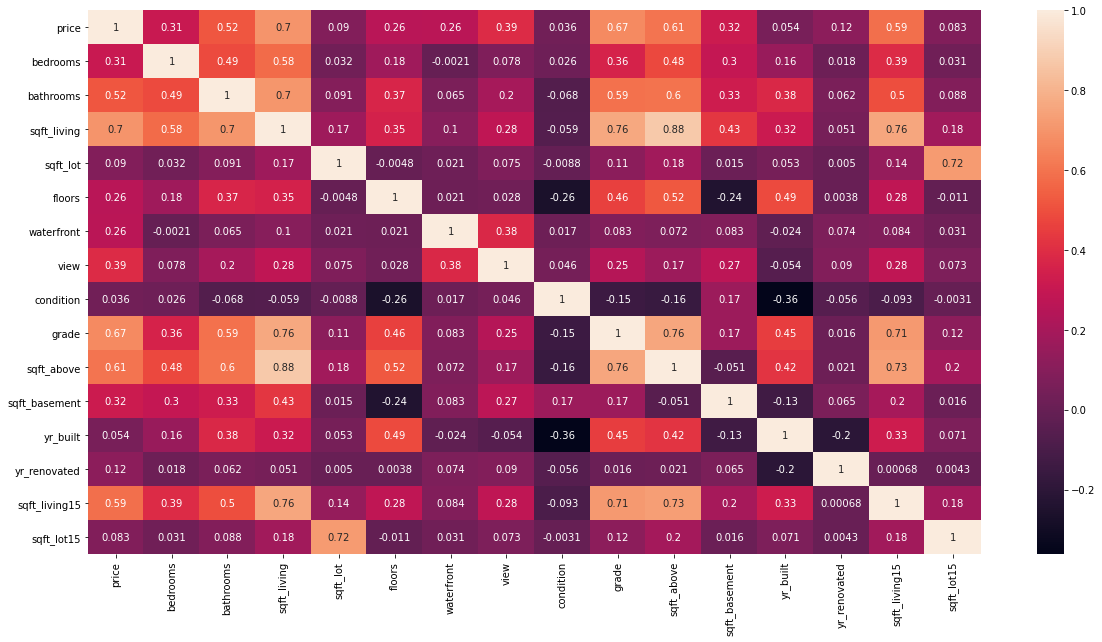

In [20]:
# Let's drop some columns as they will mislead our results
df_copy=df.drop(columns=['id','lat','long','zipcode'])
df_without_date=df_copy.drop(columns='date')
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df_without_date.corr(), annot=True, ax=ax)

We could that the price is mostly correlated with features (sqft_living ,grade, sqft_above, yr_built & sgft_living15)
which we will check with Linear Models Later

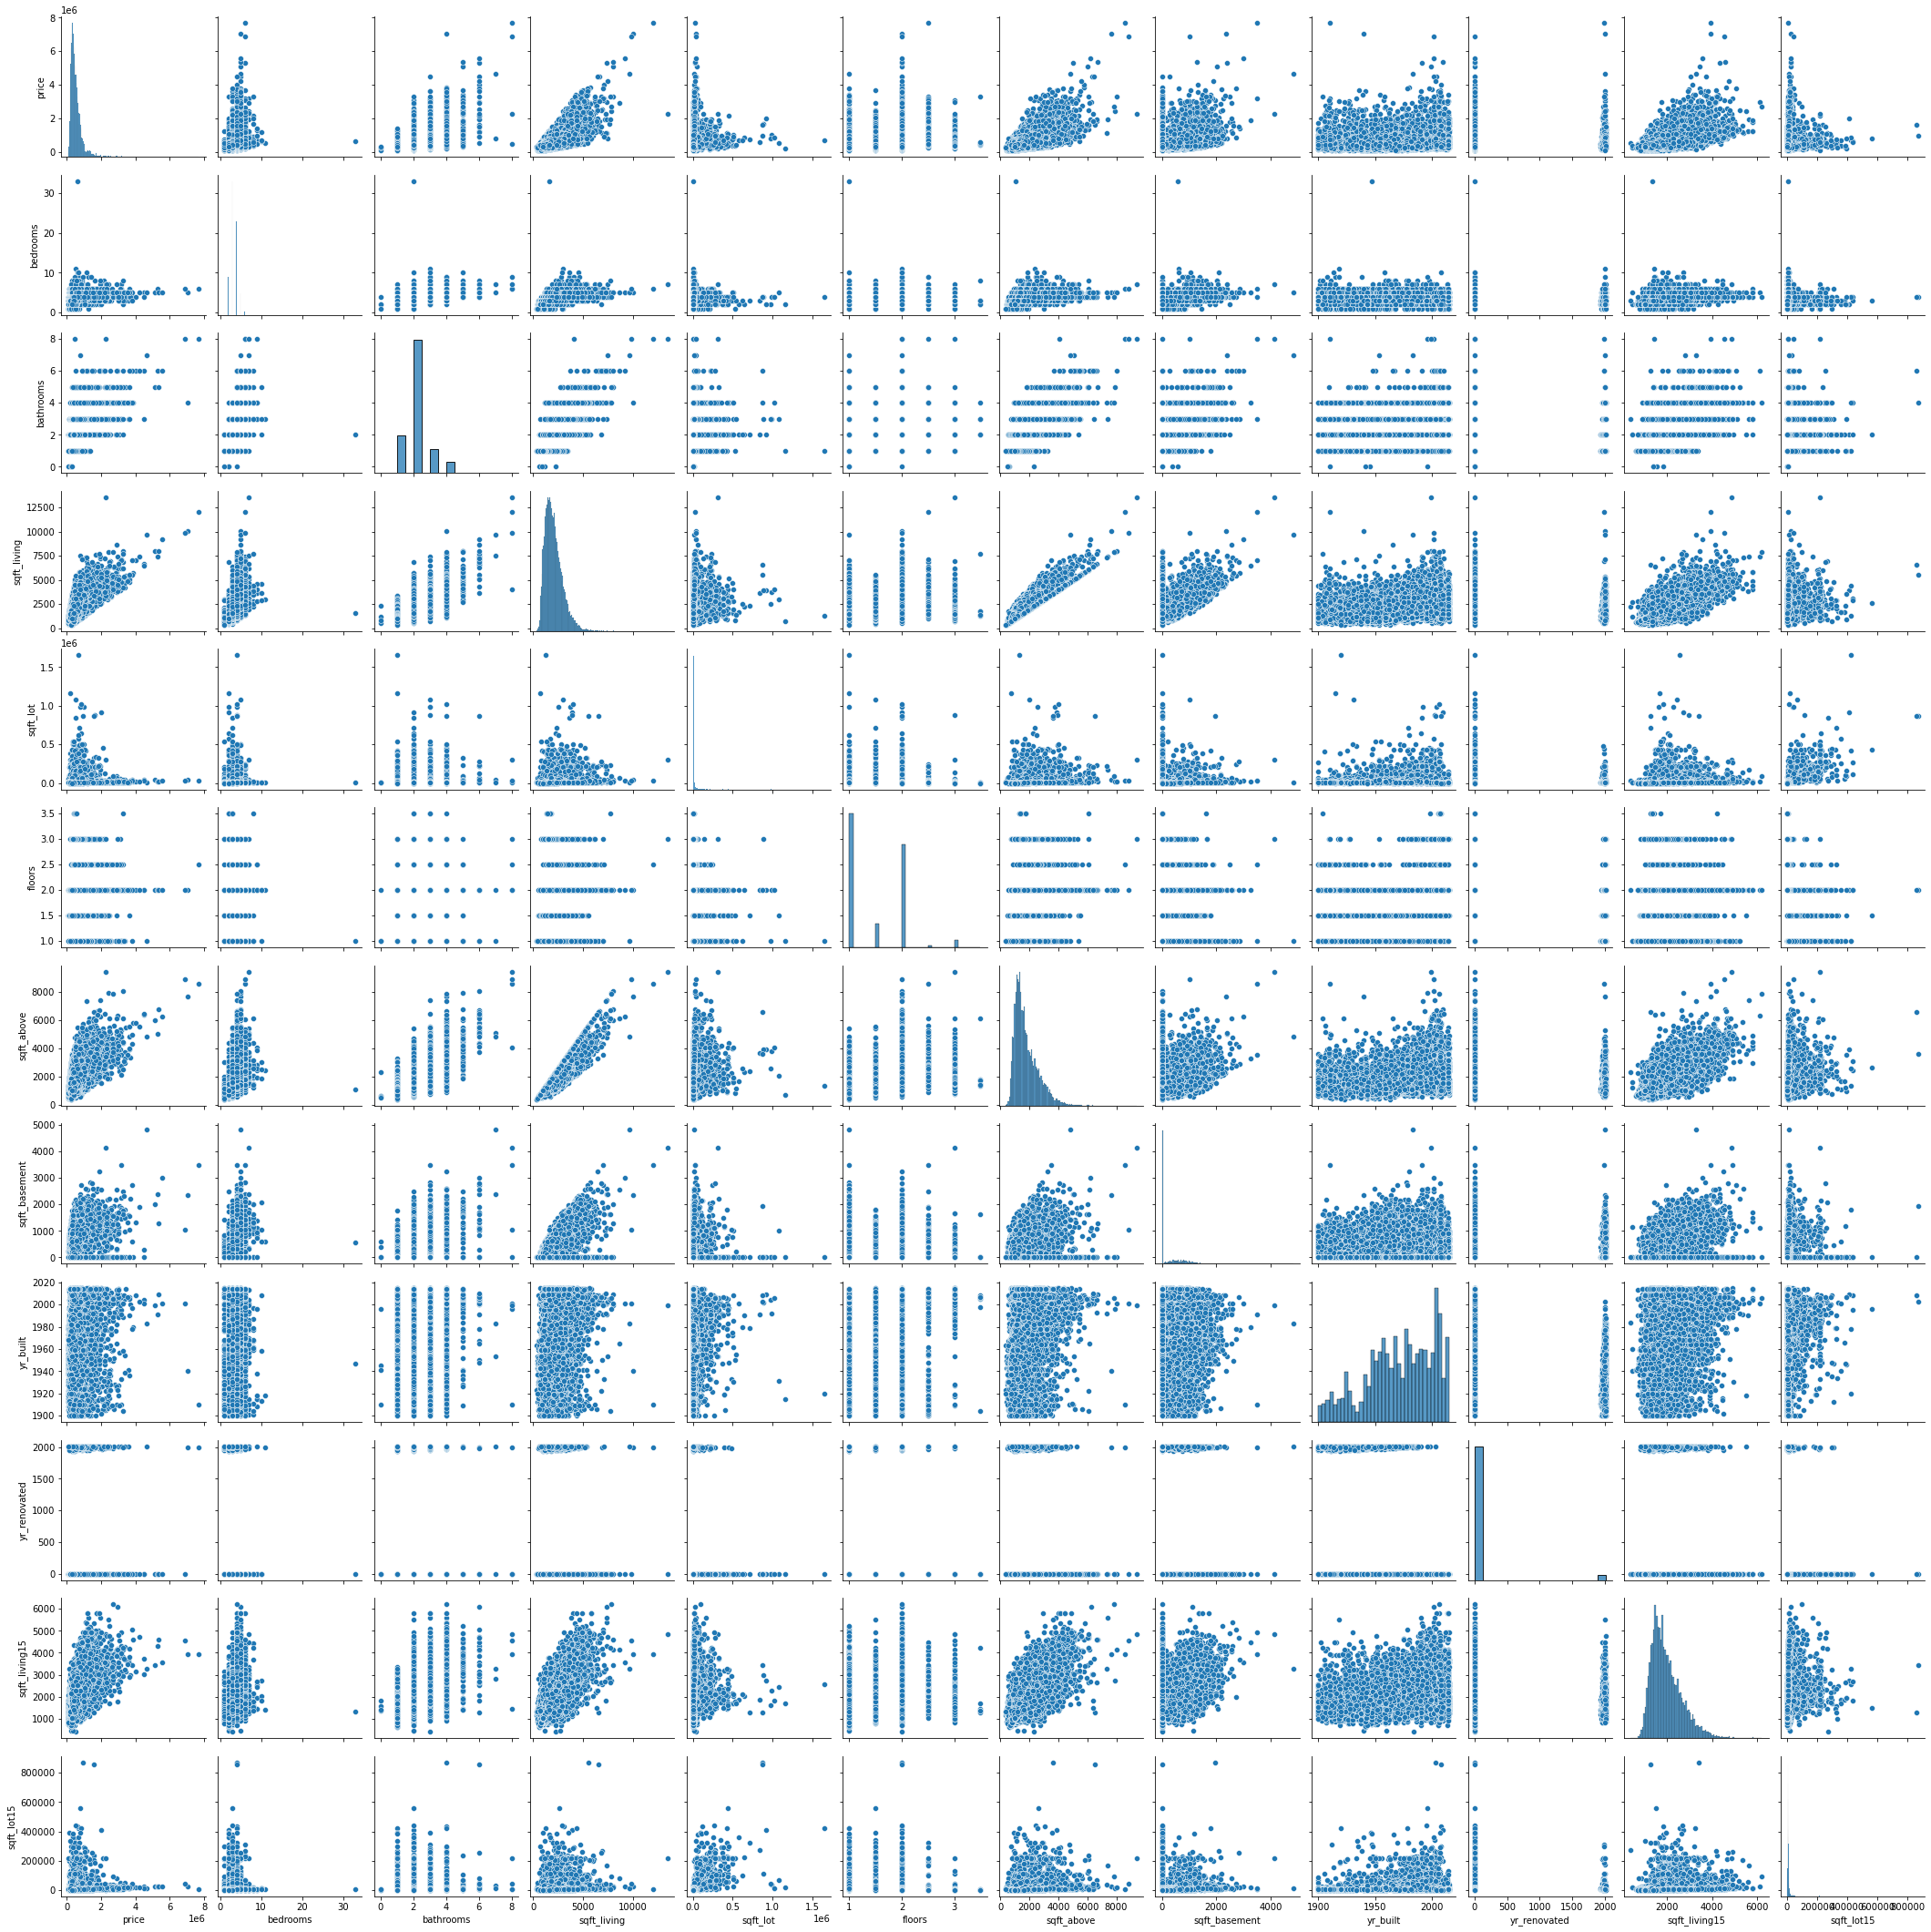

In [21]:
# Let's plot a pairplot but without categorical data 
reduced_df=df_copy.drop(columns=['date','waterfront','view','grade','condition'])
sns.pairplot(reduced_df)

Check the distribution of each column by histogram plots :

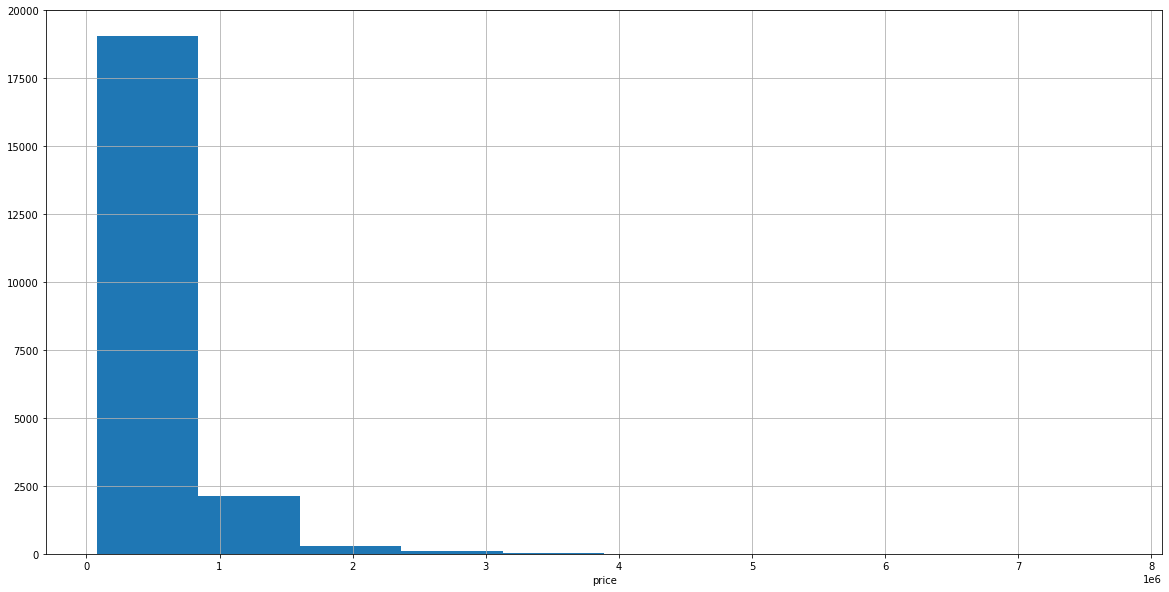

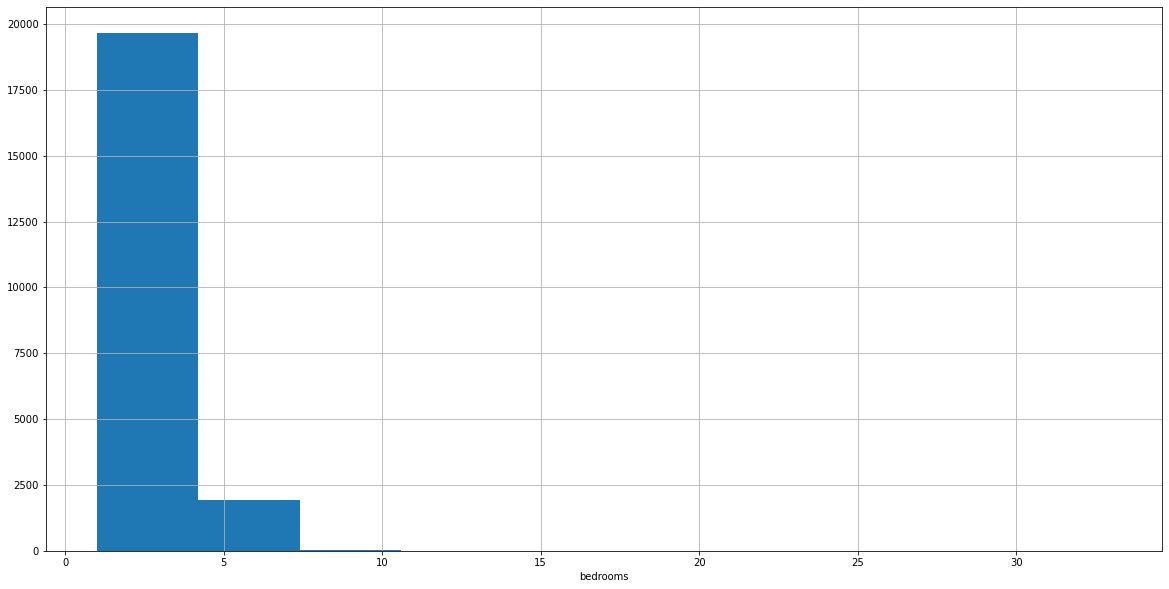

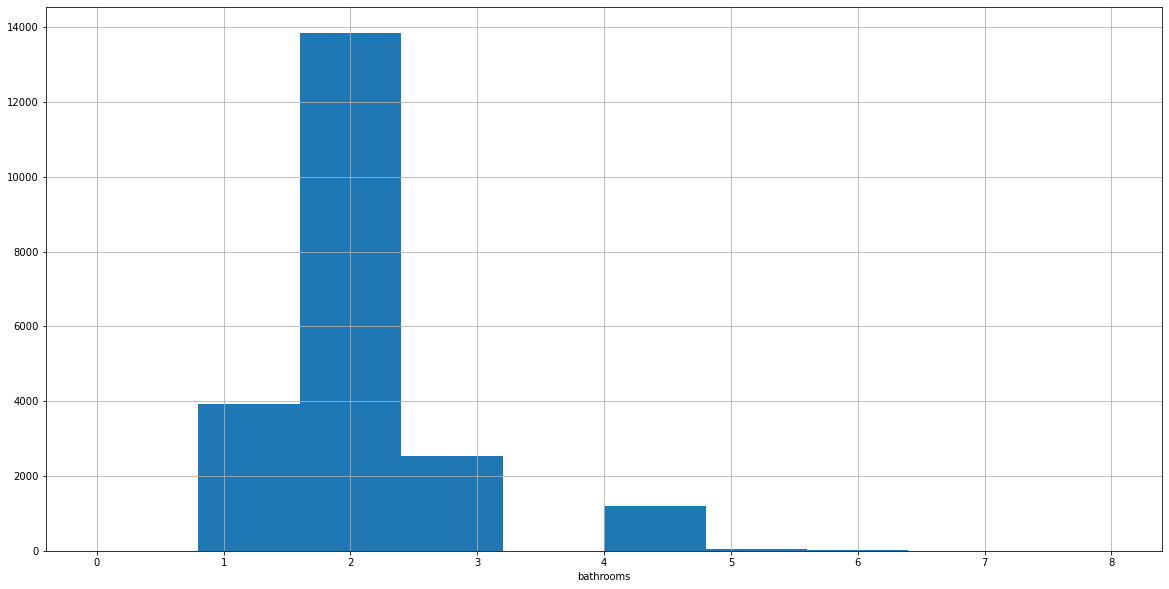

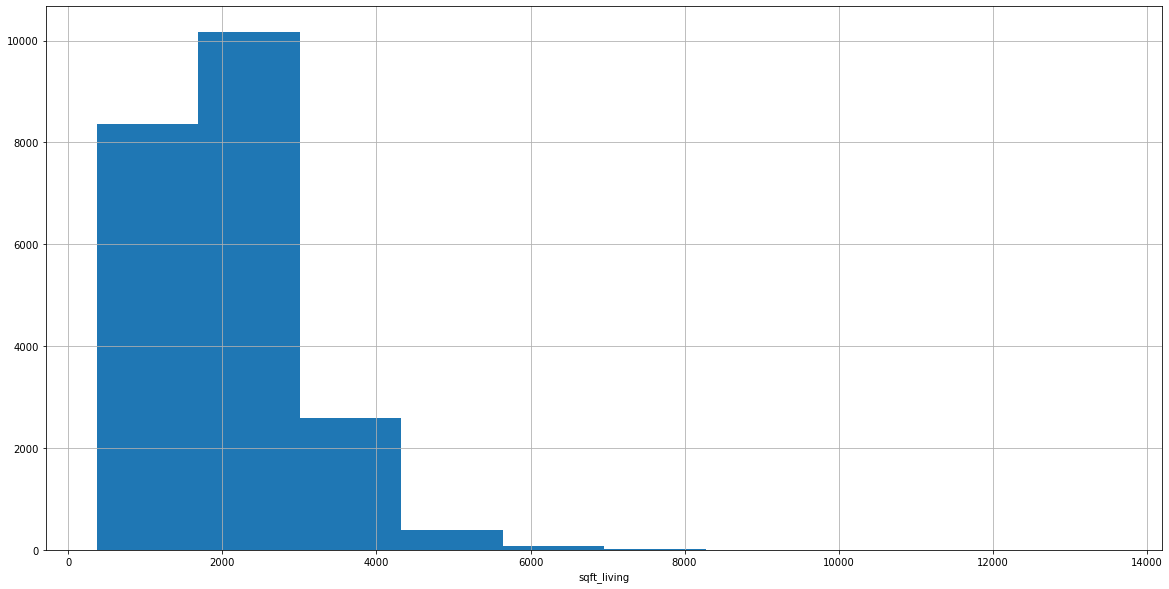

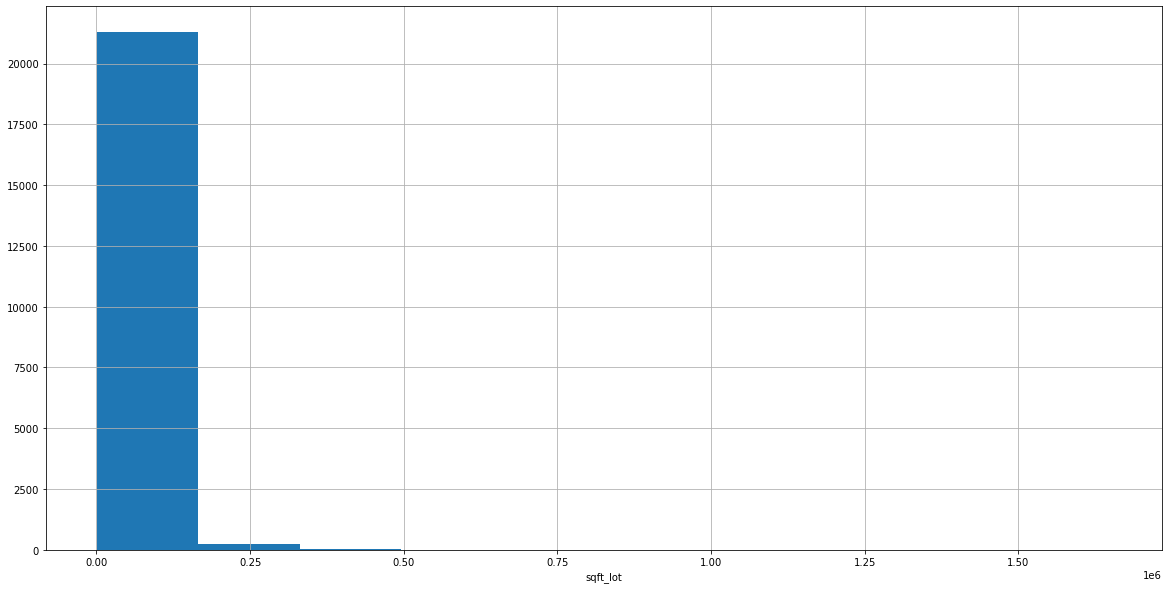

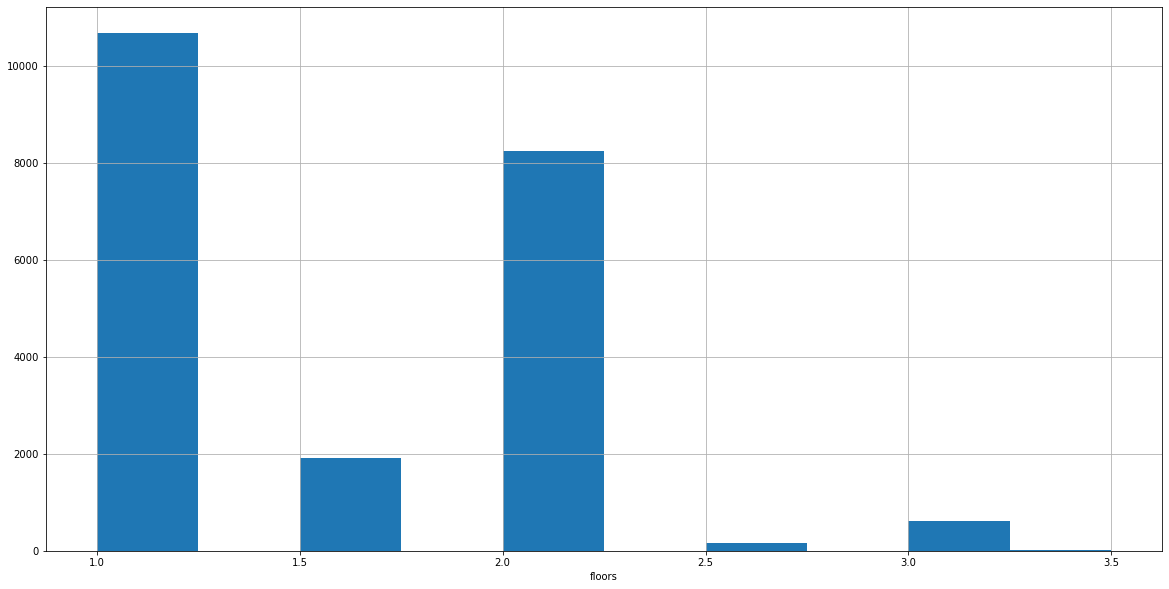

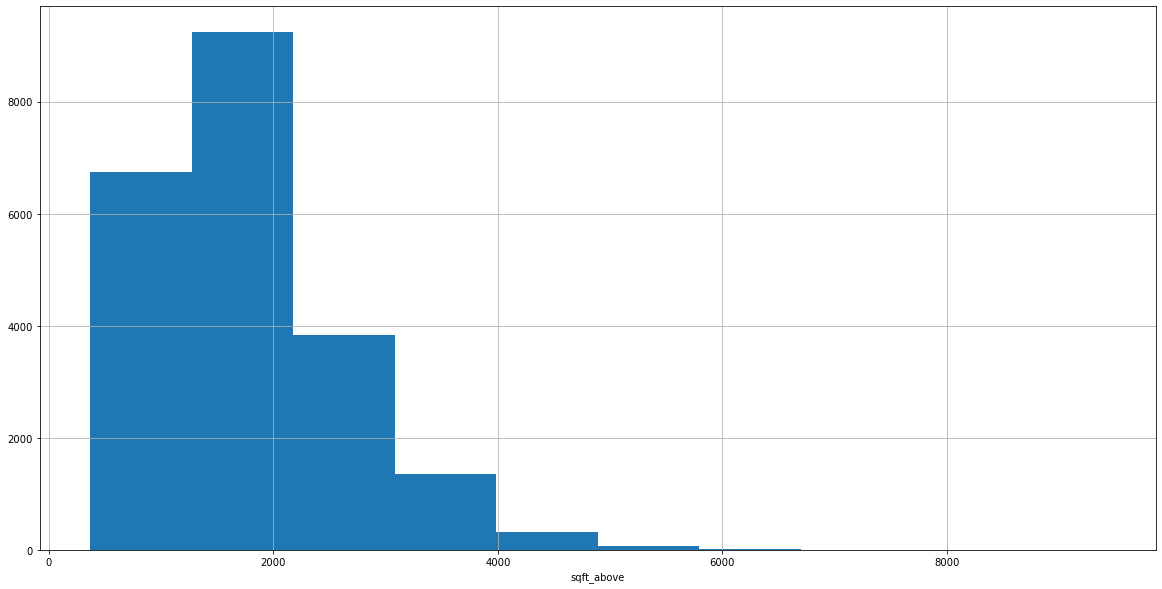

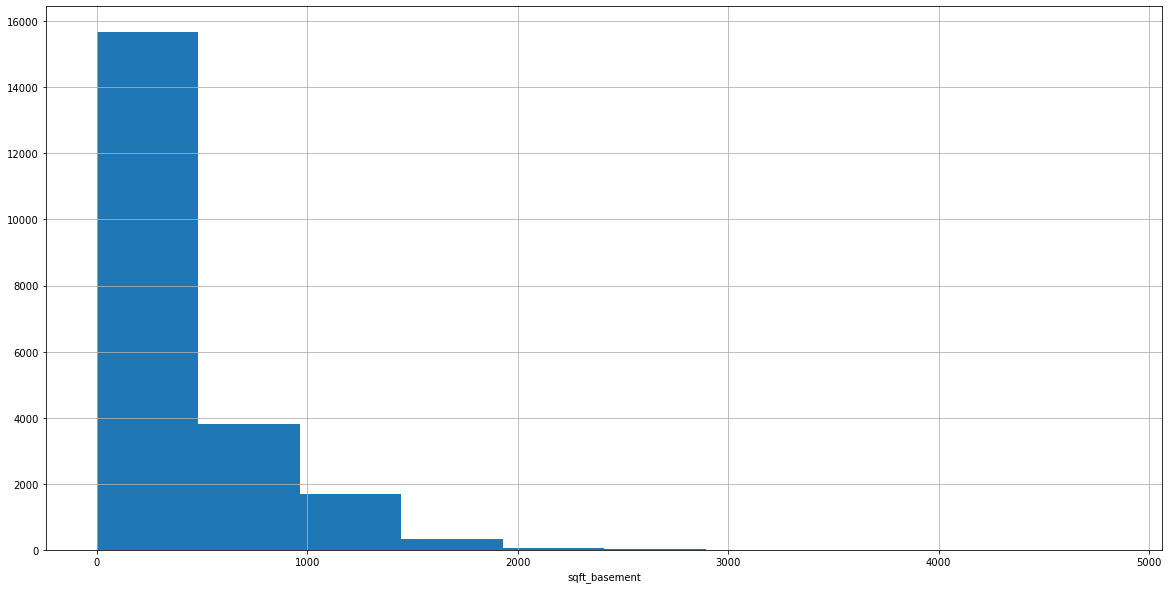

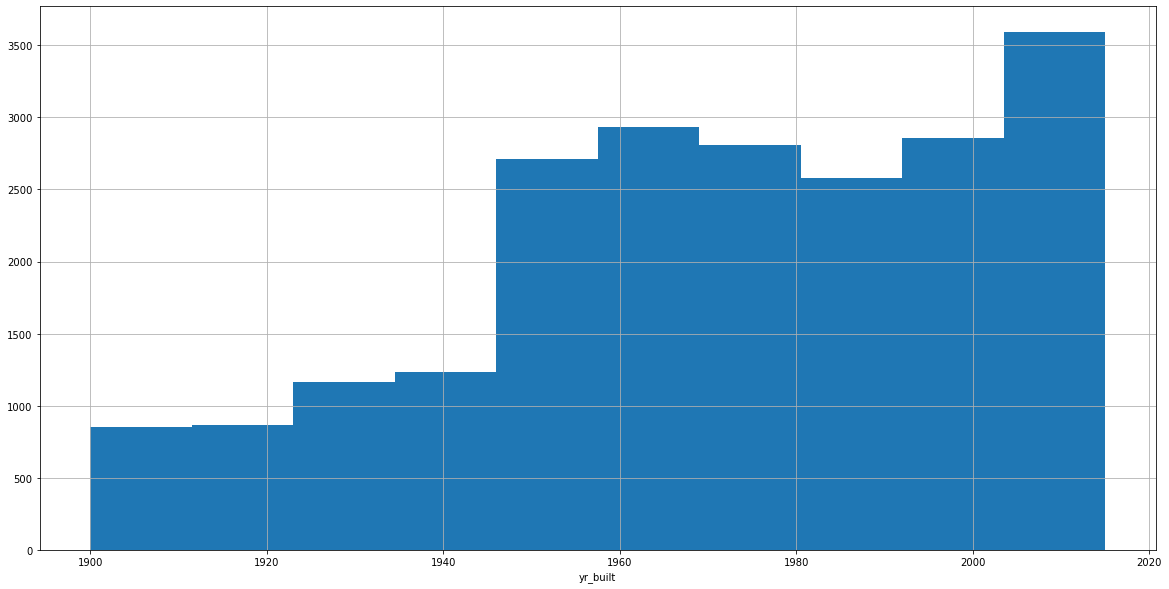

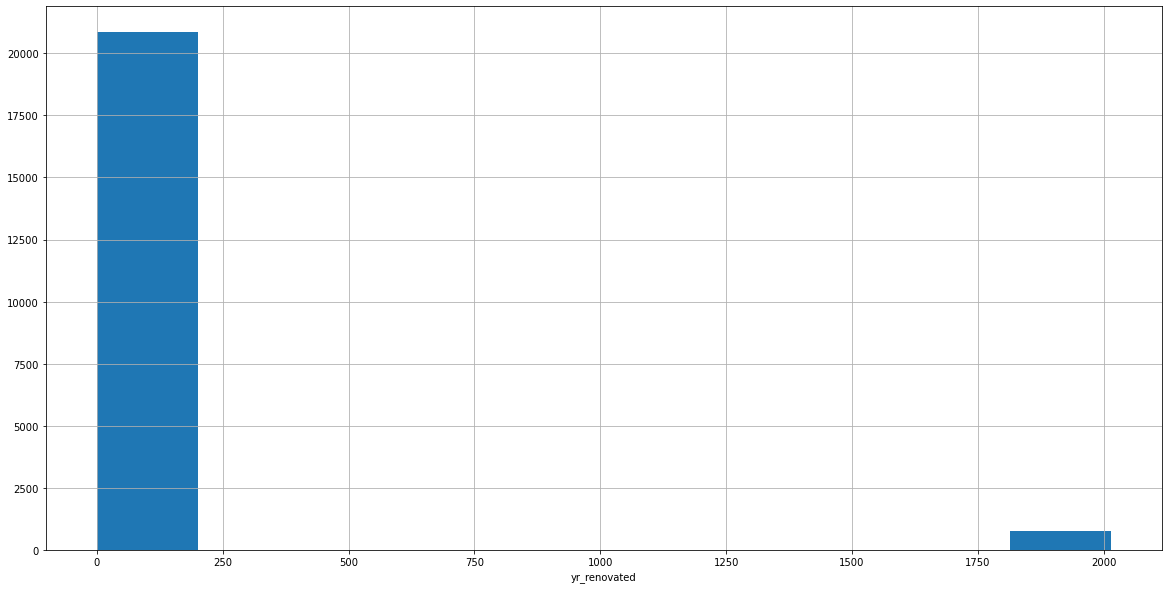

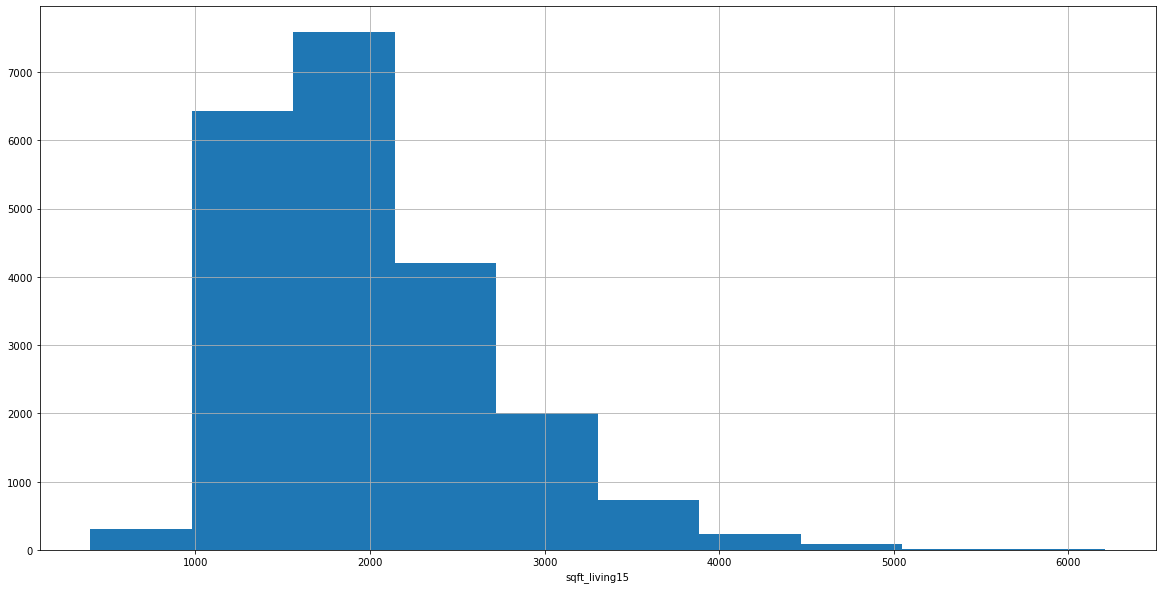

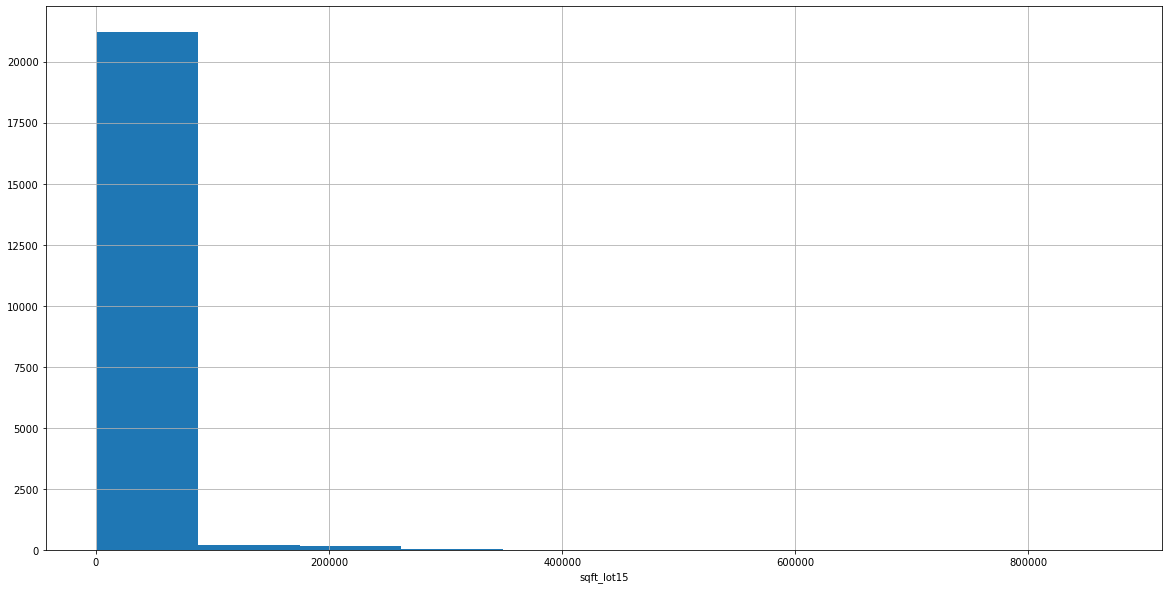

In [22]:
for column in reduced_df:
    plt.figure(figsize=(20,10))
    reduced_df[column].hist()
    plt.xlabel(column)
    plt.show()

We found that most of the features are left skewed which means that lower areas and the prices are sold more than higher ones while the yr_built column is right skewed which means that most of the sold houses are recently buit.

Check the variations in each feature by plotting a box plot:

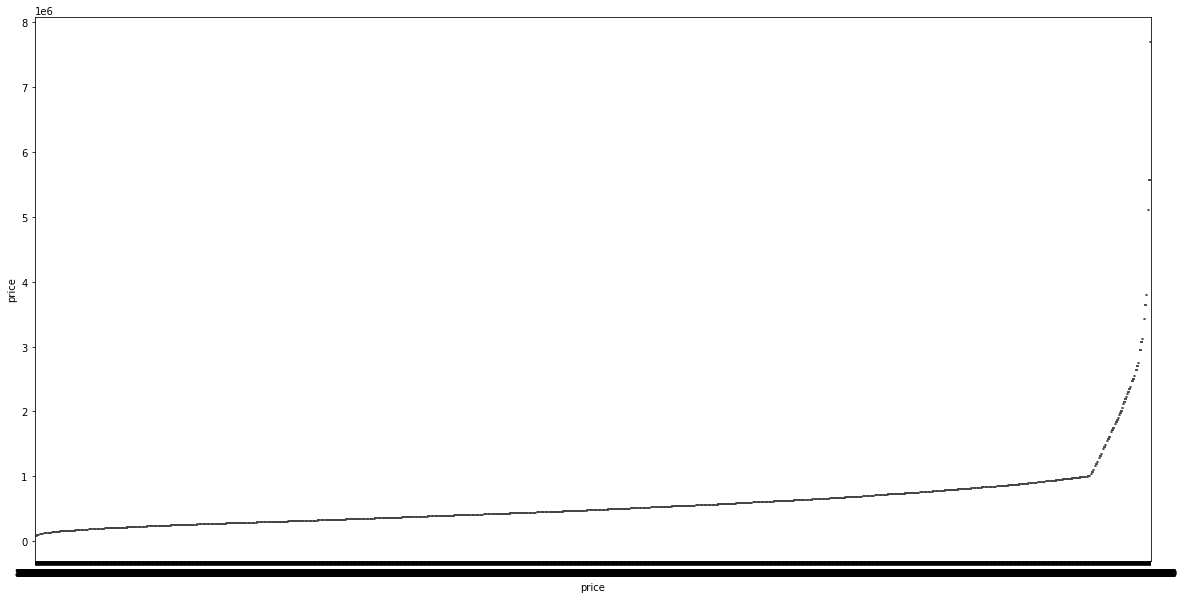

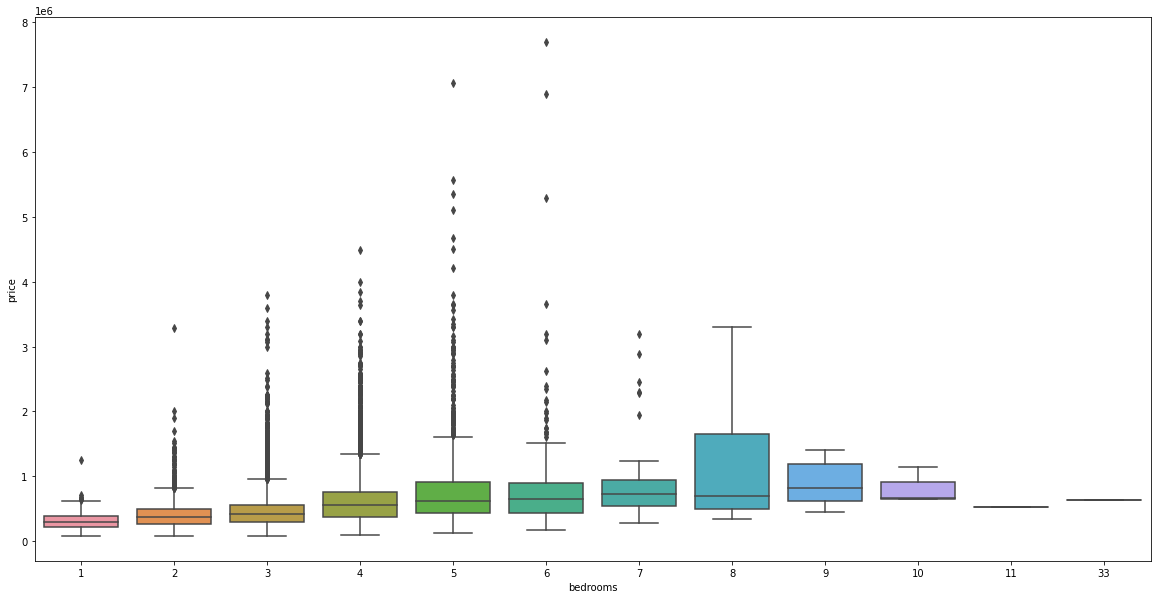

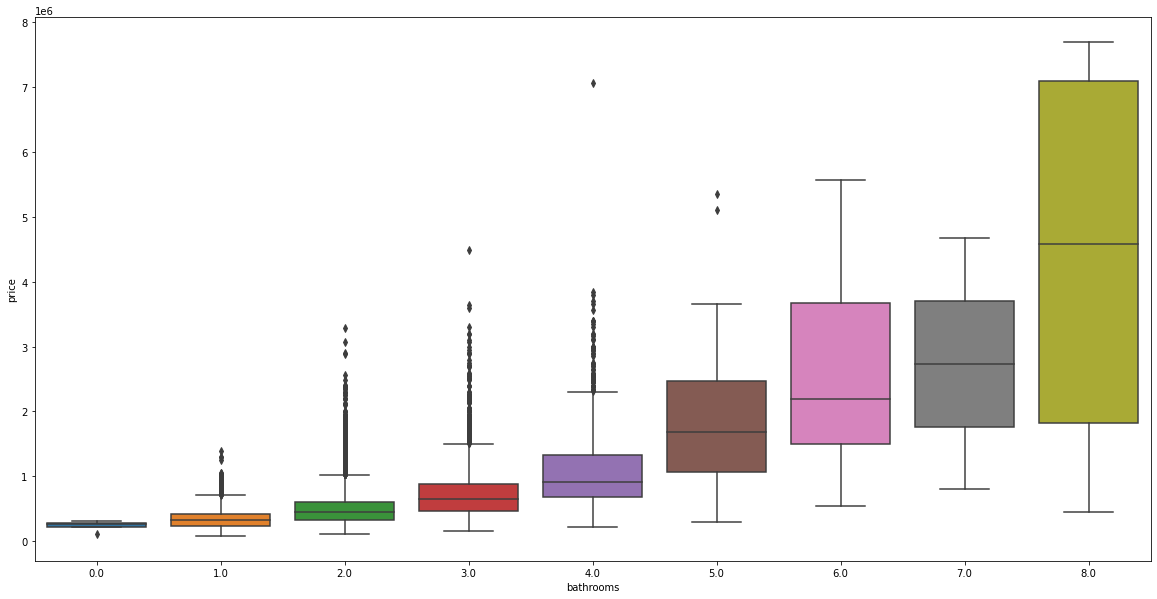

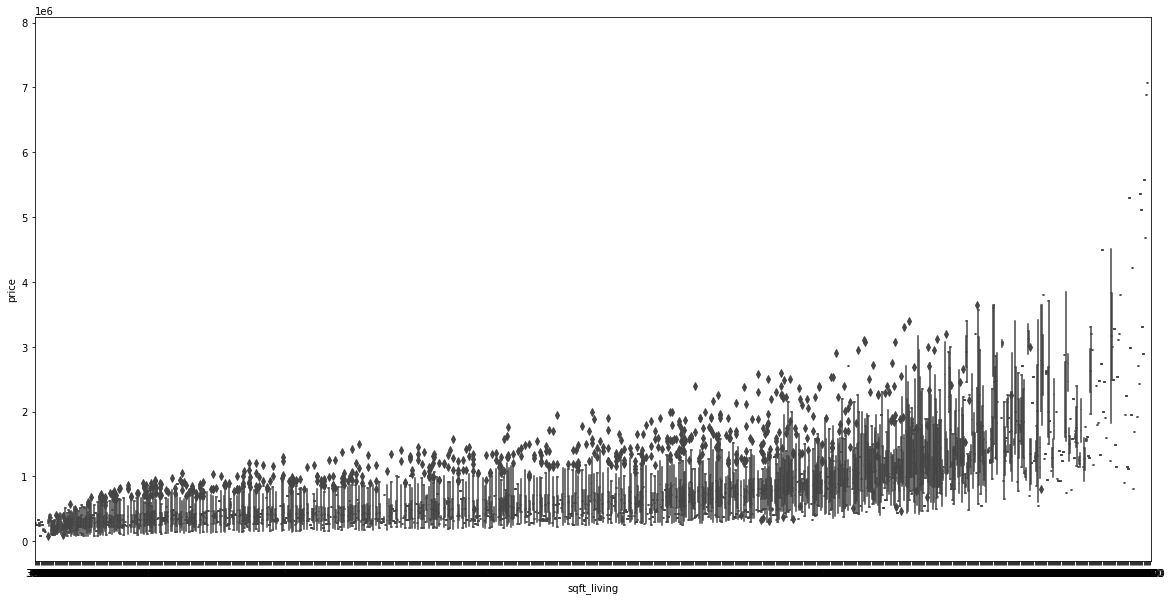

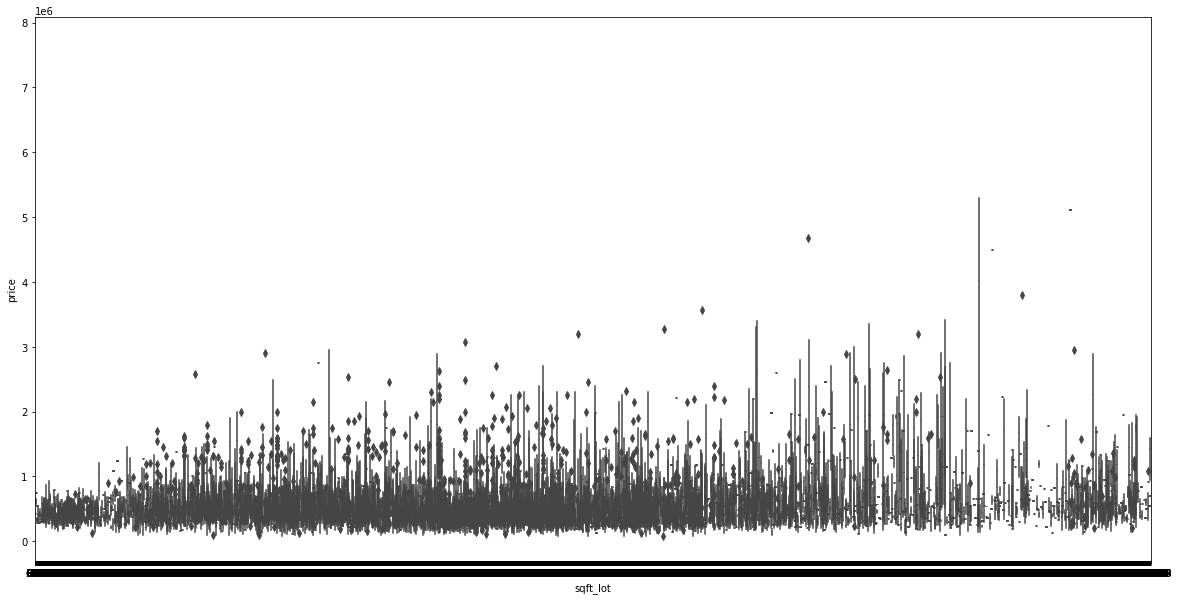

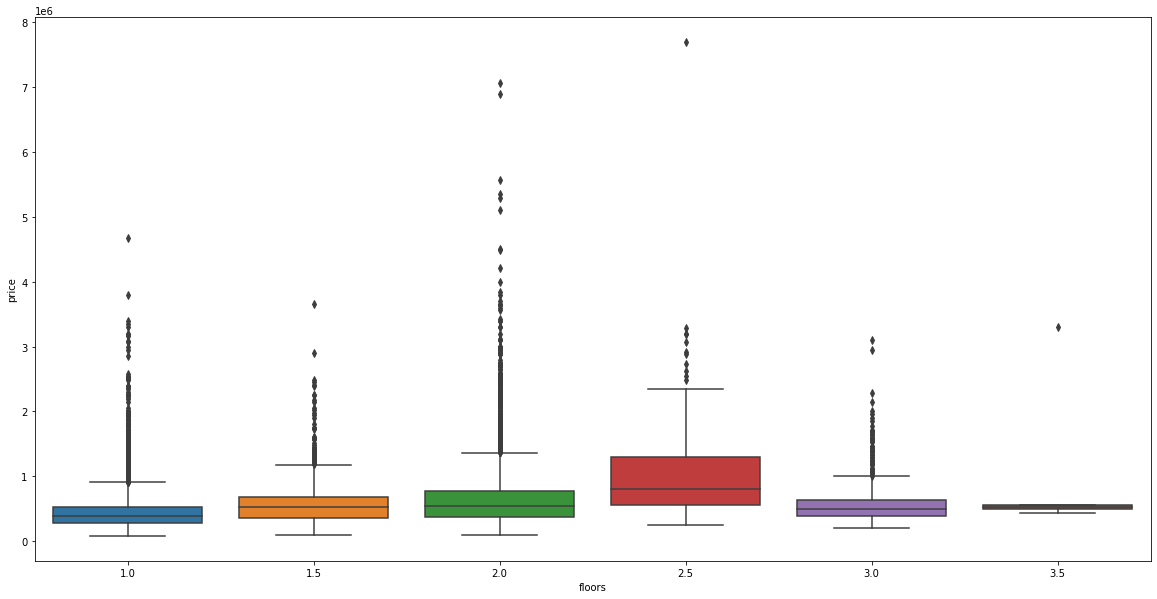

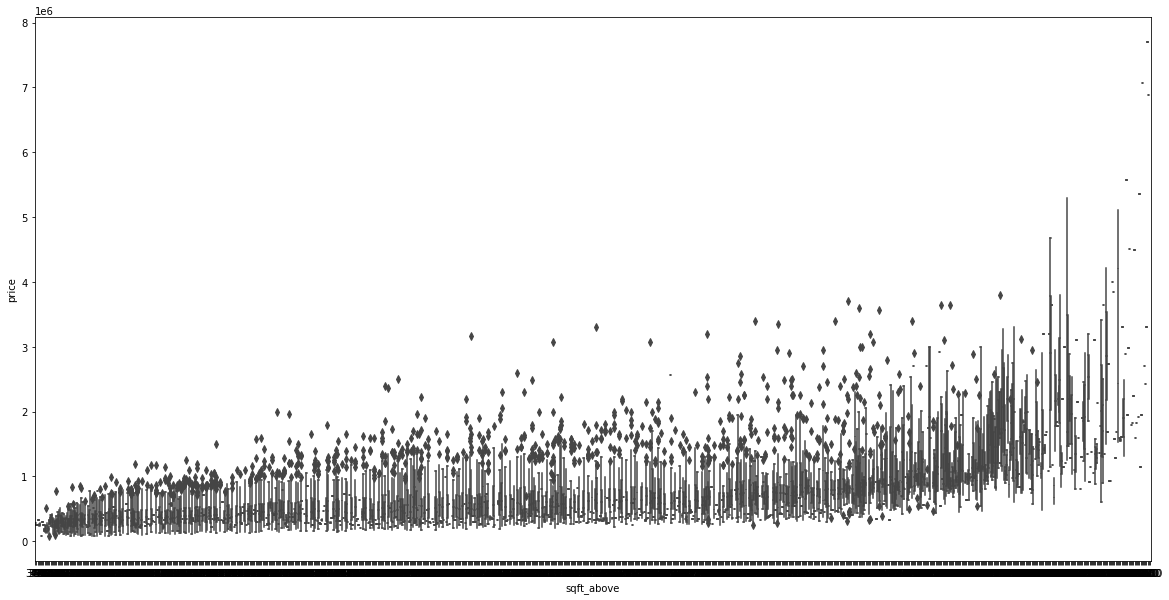

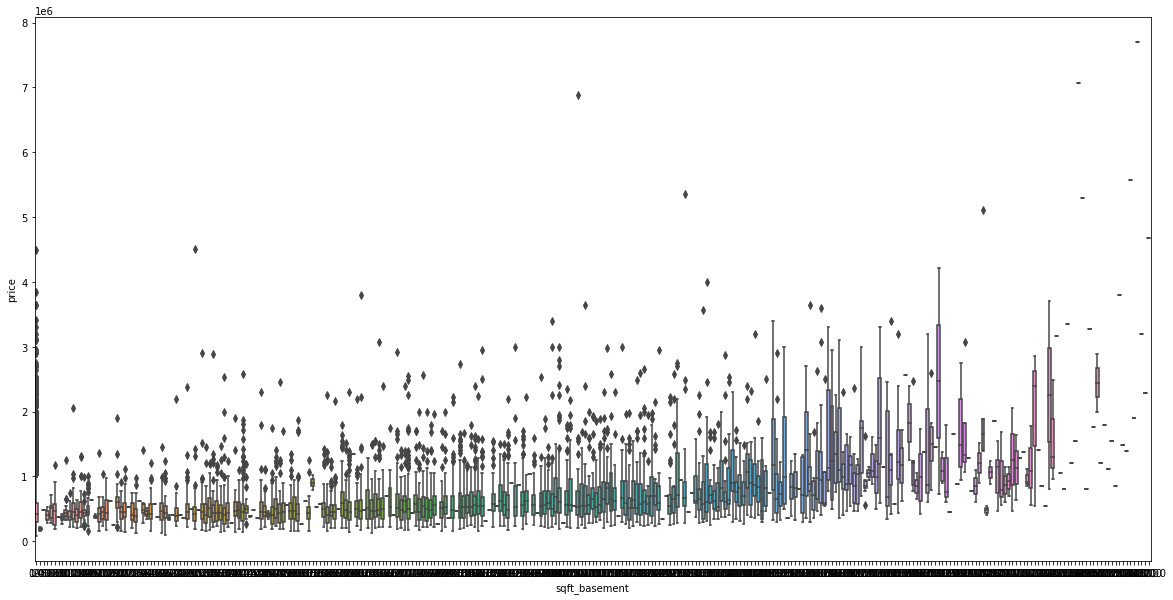

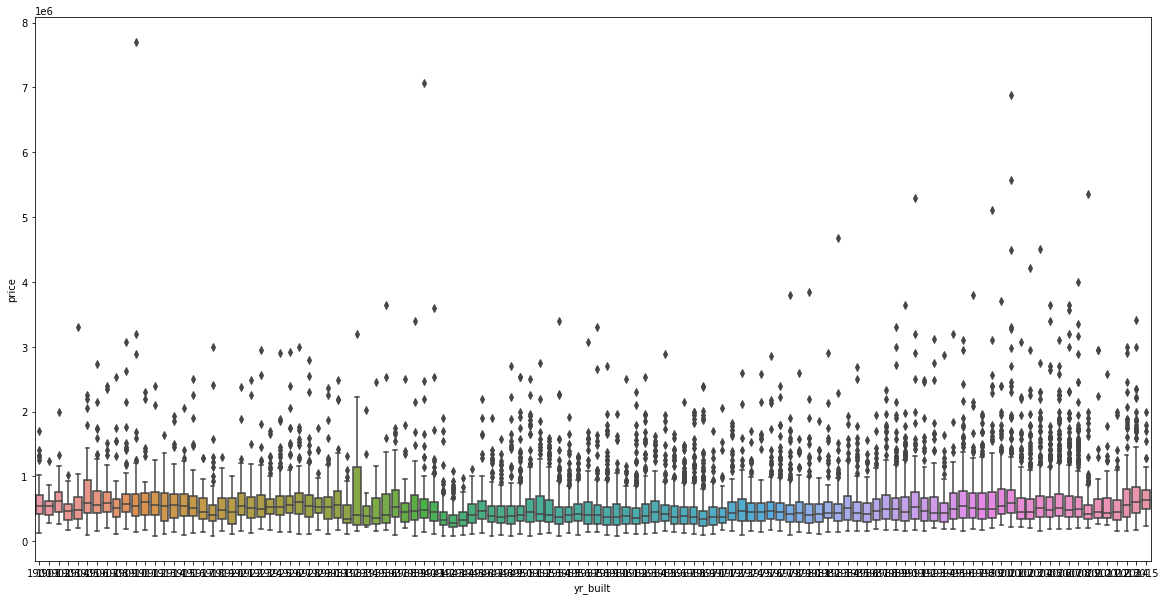

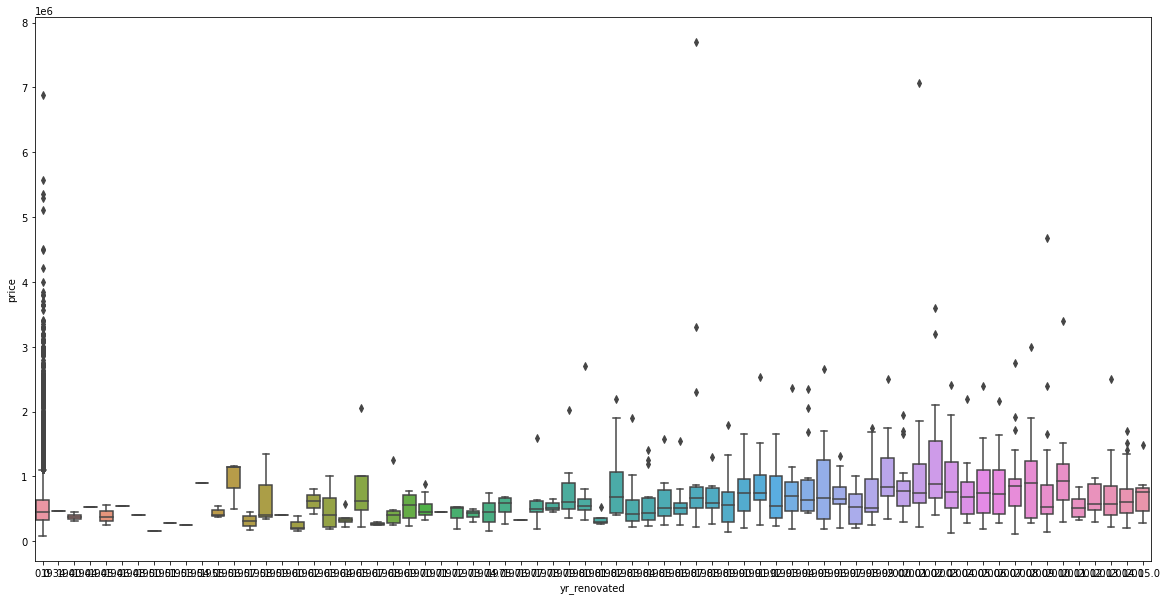

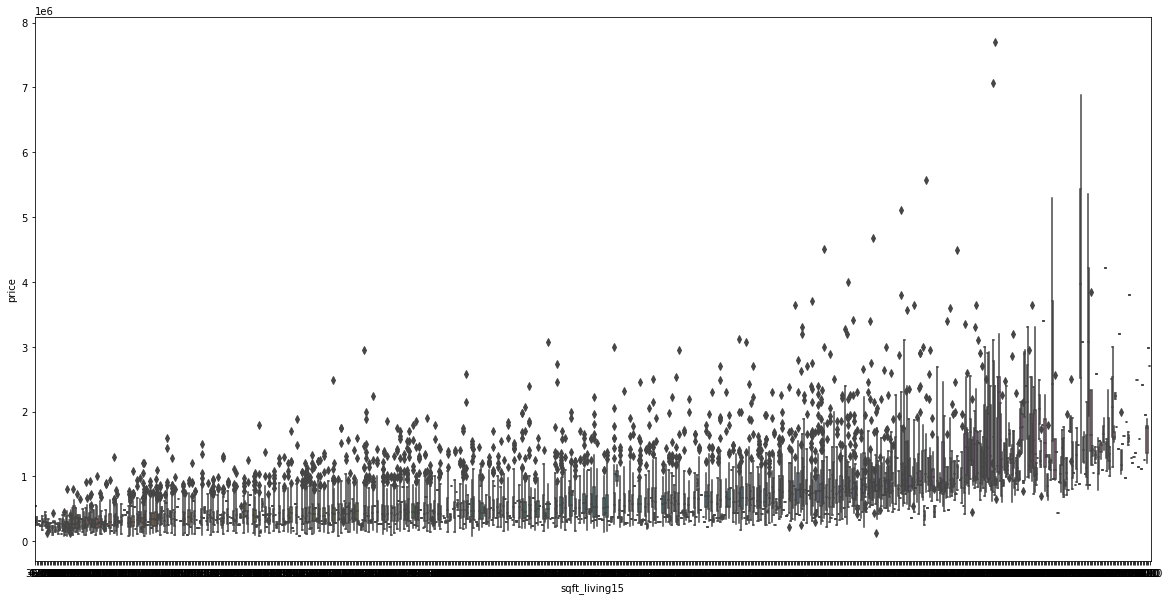

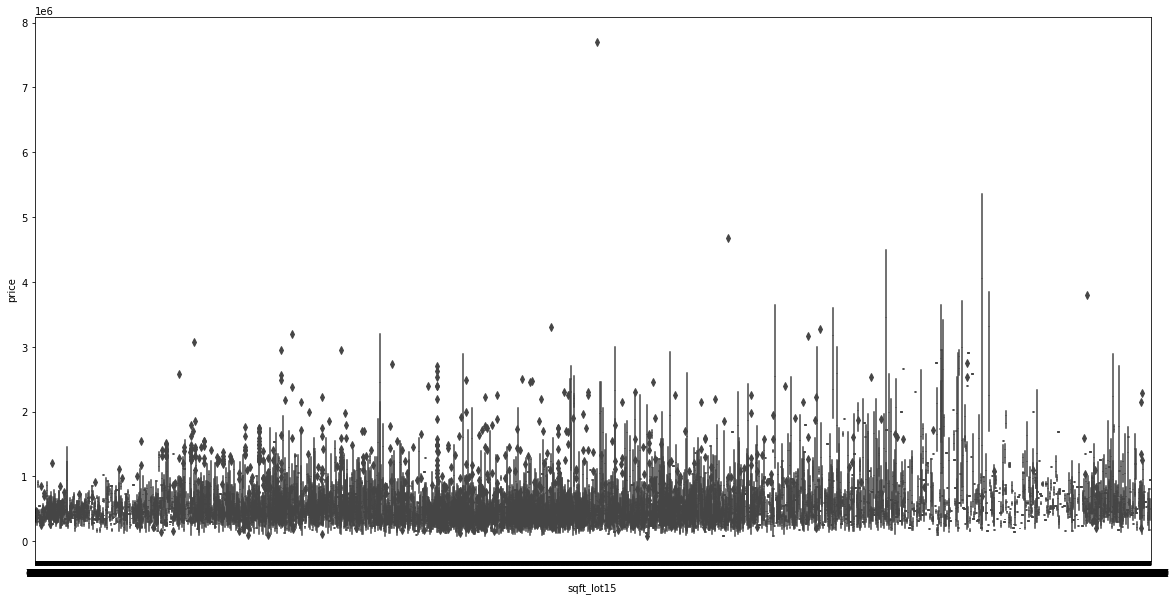

In [23]:
for column in reduced_df:
    plt.figure(figsize=(20,10))
    sns.boxplot(x=column, y="price",data=reduced_df)


In [ ]:
fig, ax = plt.subplots(figsize=(20,10),nrows=len(reduced_df))

sns.boxplot(x="bedrooms", y="price",data=reduced_df, ax=ax)
plt.show()

Let's build our Regression Models:

Build a simple Linear model based on the previous observation

Check linear regression model for sqft_living vs price:

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Tue, 04 Jan 2022   Prob (F-statistic):               0.00
Time:                        11:54:30   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

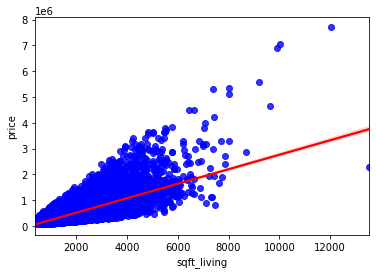

In [26]:
simple_model_1 = sm.formula.ols(formula='price ~ sqft_living', data=df)
result_model_1 = simple_model_1.fit()
model_1_summary=result_model_1.summary()

sns.regplot(x="sqft_living", y="price", data=df, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"});

model_1_summary

We could see that the r-squared is equal 0.493 which show a linear relationship between the area of the living space vs the price.
It also shows that the increase of sqft_living by 1,The price will increase the price 280.63.

Check linear regression model for bedrooms vs price:

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     2276.
Date:                Tue, 04 Jan 2022   Prob (F-statistic):               0.00
Time:                        11:54:46   Log-Likelihood:            -3.0631e+05
No. Observations:               21597   AIC:                         6.126e+05
Df Residuals:                   21595   BIC:                         6.126e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.272e+05   8979.293     14.166      0.000     1.1e+05    1.45e+05
bedrooms    1.225e+05   2566.930     47.709      0.000    1.17e+05    1.27e+05
==============================================================================
Omnibus:                    18831.341   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1195104.832
Skew:                           3.900   Prob(JB):                         0.00
Kurtosis:                      38.598   Cond. No.                         14.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

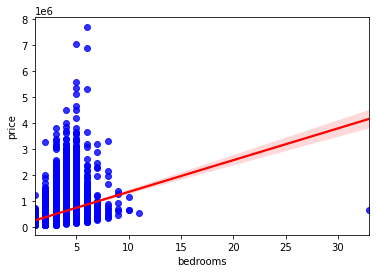

In [27]:
simple_model_2 = sm.formula.ols(formula='price ~ bedrooms', data=df)
result_model_2 = simple_model_2.fit()
model_2_summary=result_model_2.summary()

sns.regplot(x="bedrooms", y="price", data=df, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"});

model_2_summary

We could see that the r-squared is equal 0.095 which show that the is no linear relationship between the number of bedrooms vs the price.

Check linear regression model for bathrooms vs price:

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     7988.
Date:                Tue, 04 Jan 2022   Prob (F-statistic):               0.00
Time:                        11:54:49   Log-Likelihood:            -3.0399e+05
No. Observations:               21597   AIC:                         6.080e+05
Df Residuals:                   21595   BIC:                         6.080e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.911e+04   6210.344      3.077      0.002    6937.640    3.13e+04
bathrooms    2.53e+05   2831.136     89.374      0.000    2.47e+05    2.59e+05
==============================================================================
Omnibus:                    17079.418   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           853827.056
Skew:                           3.405   Prob(JB):                         0.00
Kurtosis:                      33.041   Cond. No.                         7.57
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

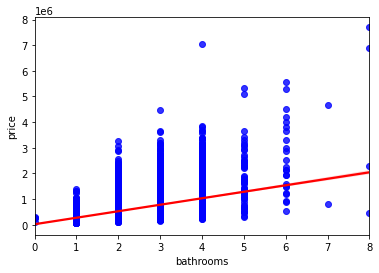

In [28]:
simple_model_3 = sm.formula.ols(formula='price ~ bathrooms', data=df)
result_model_3 = simple_model_3.fit()
model_3_summary=result_model_3.summary()

sns.regplot(x="bathrooms", y="price", data=df, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"});

model_3_summary

We could see that the r-squared is equal 0.27 which show a very weak linear relationship between the number of bathrooms vs the price.

Check linear regression model for grade vs price:

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                 1.740e+04
Date:                Tue, 04 Jan 2022   Prob (F-statistic):               0.00
Time:                        11:54:52   Log-Likelihood:            -3.0101e+05
No. Observations:               21597   AIC:                         6.020e+05
Df Residuals:                   21595   BIC:                         6.020e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.061e+06   1.23e+04    -86.396      0.000   -1.09e+06   -1.04e+06
grade       2.092e+05   1585.790    131.895      0.000    2.06e+05    2.12e+05
==============================================================================
Omnibus:                    19879.964   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2043898.709
Skew:                           4.081   Prob(JB):                         0.00
Kurtosis:                      49.954   Cond. No.                         52.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

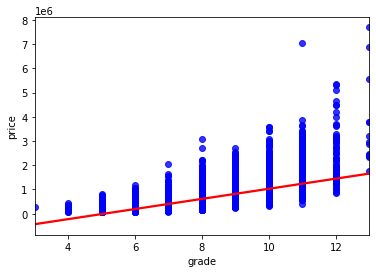

In [29]:
simple_model_4 = sm.formula.ols(formula='price ~ grade', data=df)
result_model_4 = simple_model_4.fit()
model_4_summary=result_model_4.summary()

sns.regplot(x="grade", y="price", data=df, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"});

model_4_summary

We could see that the r-squared is equal 0.446 which show a well linear relationship between the grade of the house vs the price.
It also shows that the increase of grade by 1, The price increase by 2.092e+5.

Check linear regression model for sqft_living15 vs price:

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                 1.125e+04
Date:                Tue, 04 Jan 2022   Prob (F-statistic):               0.00
Time:                        11:54:54   Log-Likelihood:            -3.0286e+05
No. Observations:               21597   AIC:                         6.057e+05
Df Residuals:                   21595   BIC:                         6.057e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -8.303e+04   6216.659    -13.356      0.000   -9.52e+04   -7.08e+04
sqft_living15   313.7615      2.958    106.064      0.000     307.963     319.560
==============================================================================
Omnibus:                    20143.282   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1910578.895
Skew:                           4.207   Prob(JB):                         0.00
Kurtosis:                      48.303   Cond. No.                     6.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

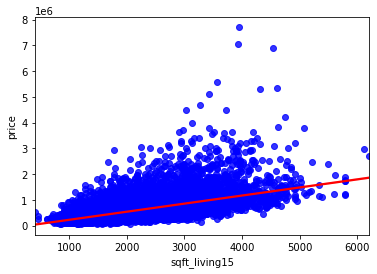

In [30]:
simple_model_5 = sm.formula.ols(formula='price ~ sqft_living15', data=df)
result_model_5 = simple_model_5.fit()
model_5_summary=result_model_5.summary()

sns.regplot(x="sqft_living15", y="price", data=df, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"});

model_5_summary


We could see that the r-squared is equal 0.343 which show a linear relationship with small dependancy between the area of the living space for the nearest 15 neighbors vs the price. 
It also shows that the increase of sqft_living15 by 1,The price will increase the price by 313.76.

Let's check a model with all numerice values:

In [31]:
Multiple_model_1 = sm.formula.ols(formula='price ~ sqft_living + bathrooms + bedrooms + grade + yr_built + waterfront  + floors + sqft_lot + view +sqft_above + sqft_basement + yr_renovated + sqft_living15 +sqft_lot15', data=df)
result_model_1 = Multiple_model_1.fit()
model_1_summary=result_model_1.summary()

model_1_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     2929.
Date:                Tue, 04 Jan 2022   Prob (F-statistic):               0.00
Time:                        11:54:57   Log-Likelihood:            -2.9589e+05
No. Observations:               21597   AIC:                         5.918e+05
Df Residuals:                   21582   BIC:                         5.919e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.419e+06   1.22e+05     52.617      0.000    6.18e+06    6.66e+06
sqft_living     113.1819     19.334      5.854      0.000      75.286     151.078
bathrooms      5.142e+04   2934.850     17.520      0.000    4.57e+04    5.72e+04
bedrooms      -3.896e+04   2018.473    -19.303      0.000   -4.29e+04    -3.5e+04
grade          1.199e+05   2255.727     53.134      0.000    1.15e+05    1.24e+05
yr_built      -3658.2055     64.295    -56.897      0.000   -3784.228   -3532.182
waterfront     6.172e+05   1.94e+04     31.747      0.000    5.79e+05    6.55e+05
floors         3.043e+04   3657.778      8.318      0.000    2.33e+04    3.76e+04
sqft_lot         -0.0105      0.051     -0.205      0.837      -0.111       0.090
view           4.295e+04   2251.450     19.075      0.000    3.85e+04    4.74e+04
sqft_above       44.8269     19.329      2.319      0.020       6.940      82.714
sqft_basement    52.5504     19.196      2.738      0.006      14.926      90.175
yr_renovated      9.0053      4.198      2.145      0.032       0.778      17.233
sqft_living15    27.7365      3.608      7.687      0.000      20.664      34.809
sqft_lot15       -0.5500      0.078     -7.026      0.000      -0.703      -0.397
==============================================================================
Omnibus:                    16183.032   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1153735.744
Skew:                           2.998   Prob(JB):                         0.00
Kurtosis:                      38.301   Cond. No.                     4.20e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.2e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The value of r-squared is 0.655 which indicates that the model is good.

Theres is a significant multicollinearity as there multiple features that are dependnt on each others that we will work on.

We can see that price of the house increase as most of features increase (directly proptional relationship) although some features as (yr_built, number of bedrooms, sqft_lot15, sqft_lot) have inverse relationship with price which is rational such that as the age of the building increases its price decreases and also the area of lot as well

Let's check the accuracy after having some Feature Scaling:

In [32]:
X=df[['bedrooms', 'bathrooms', 'sqft_living',
     'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
     'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
     'sqft_living15', 'sqft_lot15']]

y = df['price']


Try Normalization:

In [33]:
norm = MinMaxScaler().fit(X)

# transform training data
X_norm = norm.transform(X)


X_ = sm.add_constant(X_norm)

model = sm.OLS(y,X_) # X_ here
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     2746.
Date:                Tue, 04 Jan 2022   Prob (F-statistic):               0.00
Time:                        11:55:01   Log-Likelihood:            -2.9586e+05
No. Observations:               21597   AIC:                         5.918e+05
Df Residuals:                   21581   BIC:                         5.919e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.672e+05   1.07e+04    -15.634      0.000   -1.88e+05   -1.46e+05
x1         -1.273e+06   6.46e+04    -19.709      0.000    -1.4e+06   -1.15e+06
x2          4.011e+05   2.35e+04     17.085      0.000    3.55e+05    4.47e+05
x3          1.434e+06   2.54e+05      5.639      0.000    9.36e+05    1.93e+06
x4         -9428.2704   8.44e+04     -0.112      0.911   -1.75e+05    1.56e+05
x5          8.195e+04   9160.129      8.946      0.000     6.4e+04    9.99e+04
x6          6.157e+05   1.94e+04     31.713      0.000    5.78e+05    6.54e+05
x7          1.715e+05   8992.598     19.066      0.000    1.54e+05    1.89e+05
x8              8e+04   9933.829      8.054      0.000    6.05e+04    9.95e+04
x9          1.197e+06   2.25e+04     53.164      0.000    1.15e+06    1.24e+06
x10         4.463e+05   1.75e+05      2.557      0.011    1.04e+05    7.88e+05
x11         2.645e+05   9.24e+04      2.863      0.004    8.34e+04    4.46e+05
x12        -4.023e+05   7728.510    -52.053      0.000   -4.17e+05   -3.87e+05
x13         2.822e+04   8538.008      3.306      0.001    1.15e+04     4.5e+04
x14         1.635e+05   2.09e+04      7.808      0.000    1.22e+05    2.05e+05
x15        -4.907e+05   6.81e+04     -7.209      0.000   -6.24e+05   -3.57e+05
==============================================================================
Omnibus:                    16289.189   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1180952.301
Skew:                           3.024   Prob(JB):                         0.00
Kurtosis:                      38.718   Cond. No.                         326.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see that r-squared increased to be 0.656 after normalization which indicates that normalization increase the accuracy and also F-statistic has decrease after normaliztions which is a good indication for model statisticaly.
Cond. No. also decrease which means that multicollinearity has been decreased which is better for the model.

Try Standarization:

In [34]:
# data standardization with  sklearn

# copy of datasets
X_stand = X.copy()

# numerical features
num_cols = ['sqft_living','sqft_lot', 'sqft_above', 'sqft_basement','sqft_living15', 'sqft_lot15']

# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(X_stand[[i]])
    
    # transform the training data column
    X_stand[i] = scale.transform(X_stand[[i]])


X_ = sm.add_constant(X_stand)

model = sm.OLS(y,X_) # X_ here
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     2746.
Date:                Tue, 04 Jan 2022   Prob (F-statistic):               0.00
Time:                        11:55:04   Log-Likelihood:            -2.9586e+05
No. Observations:               21597   AIC:                         5.918e+05
Df Residuals:                   21581   BIC:                         5.919e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.437e+06    1.3e+05     49.371      0.000    6.18e+06    6.69e+06
bedrooms      -3.977e+04   2018.001    -19.709      0.000   -4.37e+04   -3.58e+04
bathrooms      5.014e+04   2934.817     17.085      0.000    4.44e+04    5.59e+04
sqft_living    9.997e+04   1.77e+04      5.639      0.000    6.52e+04    1.35e+05
sqft_lot       -236.5103   2117.656     -0.112      0.911   -4387.272    3914.252
floors         3.278e+04   3664.052      8.946      0.000    2.56e+04       4e+04
waterfront     6.157e+05   1.94e+04     31.713      0.000    5.78e+05    6.54e+05
view           4.286e+04   2248.150     19.066      0.000    3.85e+04    4.73e+04
condition          2e+04   2483.457      8.054      0.000    1.51e+04    2.49e+04
grade          1.197e+05   2252.436     53.164      0.000    1.15e+05    1.24e+05
sqft_above     4.087e+04    1.6e+04      2.557      0.011    9541.240    7.22e+04
sqft_basement  2.414e+04   8430.873      2.863      0.004    7612.561    4.07e+04
yr_built      -3498.1886     67.204    -52.053      0.000   -3629.914   -3366.463
yr_renovated     14.0071      4.237      3.306      0.001       5.702      22.312
sqft_living15  1.928e+04   2469.085      7.808      0.000    1.44e+04    2.41e+04
sqft_lot15    -1.537e+04   2132.340     -7.209      0.000   -1.96e+04   -1.12e+04
==============================================================================
Omnibus:                    16289.189   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1180952.301
Skew:                           3.024   Prob(JB):                         0.00
Kurtosis:                      38.718   Cond. No.                     1.75e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.75e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We can see that the r-squared is the same as the model after normalization but we can see that the condition number increased which is not preferred for the model. so we can conclude that the model after normalization is the best till now

Selecting some features that has the highest correlation with price to build another model:

In [35]:
Multiple_model_2 = sm.formula.ols(formula='price ~ sqft_living + bathrooms + bedrooms + grade + waterfront  + floors', data=df)
result_model_2 = Multiple_model_2.fit()
model_2_summary=result_model_2.summary()

model_2_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     4980.
Date:                Tue, 04 Jan 2022   Prob (F-statistic):               0.00
Time:                        11:55:06   Log-Likelihood:            -2.9801e+05
No. Observations:               21597   AIC:                         5.960e+05
Df Residuals:                   21590   BIC:                         5.961e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.867e+05   1.43e+04    -34.007      0.000   -5.15e+05   -4.59e+05
sqft_living   193.0558      3.423     56.403      0.000     186.347     199.765
bathrooms    2.501e+04   3115.731      8.026      0.000    1.89e+04    3.11e+04
bedrooms    -3.841e+04   2206.750    -17.407      0.000   -4.27e+04   -3.41e+04
grade        9.987e+04   2285.448     43.696      0.000    9.54e+04    1.04e+05
waterfront   8.305e+05   1.99e+04     41.664      0.000    7.91e+05     8.7e+05
floors       -4.48e+04   3416.404    -13.113      0.000   -5.15e+04   -3.81e+04
==============================================================================
Omnibus:                    15035.976   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           726879.705
Skew:                           2.791   Prob(JB):                         0.00
Kurtosis:                      30.868   Cond. No.                     2.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We can see that r-squared has decrease to be 0.646 which is not a huge difference with the previous model but we also have high condition number and high F-statistics which make the previous model is better

In [36]:
X=df[['bedrooms', 'bathrooms', 'sqft_living','grade', 'floors', 'waterfront']]

y = df['price']


Try Normalization:

In [37]:
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler().fit(X)

# transform training data
X_norm = norm.transform(X)


X_ = sm.add_constant(X_norm)

model = sm.OLS(y,X_) # X_ here
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     4980.
Date:                Tue, 04 Jan 2022   Prob (F-statistic):               0.00
Time:                        11:55:07   Log-Likelihood:            -2.9801e+05
No. Observations:               21597   AIC:                         5.960e+05
Df Residuals:                   21590   BIC:                         5.961e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.989e+05   8719.676    -22.809      0.000   -2.16e+05   -1.82e+05
x1         -1.229e+06   7.06e+04    -17.407      0.000   -1.37e+06   -1.09e+06
x2          2.001e+05   2.49e+04      8.026      0.000    1.51e+05    2.49e+05
x3          2.543e+06   4.51e+04     56.403      0.000    2.45e+06    2.63e+06
x4          9.987e+05   2.29e+04     43.696      0.000    9.54e+05    1.04e+06
x5          -1.12e+05   8541.010    -13.113      0.000   -1.29e+05   -9.53e+04
x6          8.305e+05   1.99e+04     41.664      0.000    7.91e+05     8.7e+05
==============================================================================
Omnibus:                    15035.976   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           726879.705
Skew:                           2.791   Prob(JB):                         0.00
Kurtosis:                      30.868   Cond. No.                         53.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

There is still no difference in the model after normalization except that the condition number has decreased

Try Standarization:

In [38]:
# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler

# copy of datasets
X_stand = X.copy()

# numerical features
num_cols = ['sqft_living']

# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(X_stand[[i]])
    
    # transform the training data column
    X_stand[i] = scale.transform(X_stand[[i]])


X_ = sm.add_constant(X_stand)

model = sm.OLS(y,X_) # X_ here
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     4980.
Date:                Tue, 04 Jan 2022   Prob (F-statistic):               0.00
Time:                        11:55:09   Log-Likelihood:            -2.9801e+05
No. Observations:               21597   AIC:                         5.960e+05
Df Residuals:                   21590   BIC:                         5.961e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -8.508e+04   1.94e+04     -4.377      0.000   -1.23e+05    -4.7e+04
bedrooms    -3.841e+04   2206.750    -17.407      0.000   -4.27e+04   -3.41e+04
bathrooms    2.501e+04   3115.731      8.026      0.000    1.89e+04    3.11e+04
sqft_living  1.772e+05   3142.412     56.403      0.000    1.71e+05    1.83e+05
grade        9.987e+04   2285.448     43.696      0.000    9.54e+04    1.04e+05
floors       -4.48e+04   3416.404    -13.113      0.000   -5.15e+04   -3.81e+04
waterfront   8.305e+05   1.99e+04     41.664      0.000    7.91e+05     8.7e+05
==============================================================================
Omnibus:                    15035.976   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           726879.705
Skew:                           2.791   Prob(JB):                         0.00
Kurtosis:                      30.868   Cond. No.                         112.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see that there is no difference in the r-squared after standarization and also the condition number increased

we can conclude that the best model have the features (sqft_living, bathrooms, bedrooms, grade, yr_built, waterfront, floors, sqft_lot, view, sqft_above,  sqft_basement, yr_renovated, sqft_living15, sqft_lot15) with the price (target)